In [52]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [57]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')

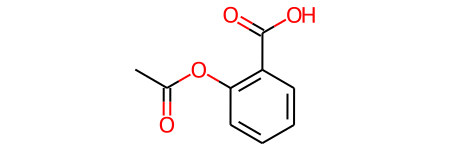

In [58]:
m

In [74]:
# you can also manually set the atoms that should be highlighted:
m.__sssAtoms = [0,0,0,1]

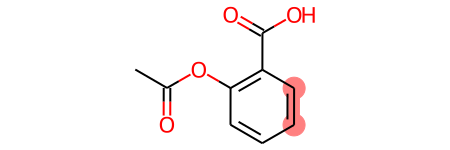

In [75]:
m

In [22]:
from rdkit import Chem, rdBase
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
from json import dumps

In [23]:

COLS = [(1.0, 0.0, 0.0), (0.0, 1.0, 0.0),
        (0.0, 0.0, 1.0), (1.0, 0.55, 1.0)]

In [51]:

def get_hit_atoms_and_bonds(mol, smt):
    alist = []
    blist = []
    q = Chem.MolFromSmarts(smt)
    for match in mol.GetSubstructMatches(q):
        alist.extend(match)

    for ha1 in alist:
        for ha2 in alist:
            if ha1 > ha2:
                b = mol.GetBondBetweenAtoms(ha1, ha2)
                if b:
                    blist.append(b.GetIdx())
    
    return alist, blist


def add_colours_to_map(els, cols, col_num):
    for el in els:
        if el not in cols:
            cols[el] = []
        if COLS[col_num] not in cols[el]:
            cols[el].append(COLS[col_num])

neg_color = [40, 100, 40 ]
pos_color = [100, 40, 100]
no_color = [0, 0, 0]
def do_a_picture(smi, smarts, filename, label, fmt='svg'):

    rdDepictor.SetPreferCoordGen(True)
    mol = Chem.MolFromSmiles(smi)
    mol = Draw.PrepareMolForDrawing(mol)

    acols = {}
    bcols = {}
    h_rads = {}
    h_lw_mult = {}

    for i, smt in enumerate(smarts):
        alist, blist = get_hit_atoms_and_bonds(mol, smt)
        print("alist:", alist)
        print("blist:", blist)
        col = i % 4
        add_colours_to_map(alist, acols, col)
        add_colours_to_map(blist, bcols, col)
        print("aclos:", acols)
        print("bcols:", bcols)
    
    if fmt == 'svg':
        d = rdMolDraw2D.MolDraw2DSVG(300, 300)
        mode = 'w'
    elif fmt == 'png':
        d = rdMolDraw2D.MolDraw2DCairo(300, 300)
        mode = 'wb'
    else:
        print('unknown format {}'.format(fmt))
        return
    
    d.drawOptions().fillHighlights = True
    d.DrawMoleculeWithHighlights(mol, label, acols, bcols, h_rads, h_lw_mult, -1)
    d.FinishDrawing()
        
    with open(filename, mode) as f:
        f.write(d.GetDrawingText())

In [49]:
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
smarts = ['CONN', 'N#CC~CO', 'C=CON', 'CONNCN']
smarts_1 = ['CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]']

In [65]:
do_a_picture(smi, smarts_1, 'atom_highlights_3_v1.png', '', fmt='png')

alist: [13, 14, 15, 16]
blist: [13, 14, 15]
aclos: {13: [(1.0, 0.0, 0.0)], 14: [(1.0, 0.0, 0.0)], 15: [(1.0, 0.0, 0.0)], 16: [(1.0, 0.0, 0.0)]}
bcols: {13: [(1.0, 0.0, 0.0)], 14: [(1.0, 0.0, 0.0)], 15: [(1.0, 0.0, 0.0)]}


In [ ]:
dataset.num_node_features